# Data Loading

In [66]:
import pandas as pd

Loading dataset on which we are applying transfer learning.

In [67]:
data = pd.read_csv(r'raw_data.csv')
data.head()

,Sno,Date,Headline,Covid,Sentiment,Description,Image,Source
0,0,2020-04-29,"Coronavirus cases reach 2,438 in Rajasthan; 814 patients recover",1,0,"Rajasthan on Wednesday reported 74 new coronavirus cases, taking the total number of cases in the state to 2,438. All three deaths reported in the state today were from Jaipur, taking the death toll to 55. Notably, 814 patients have recovered in the state and 592 were discharged. Jaipur is the worst-hit district with 878 cases and 30 deaths.",https://static.inshorts.com/inshorts/images/v1/variants/jpg/m/2020/04_apr/29_wed/img_1588180677405_112.jpg,http://www.rajswasthya.nic.in/?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts
1,1,2020-04-29,"Coronavirus cases in Delhi surge to 3,439 after 125 new cases reported today",1,0,"The total number of coronavirus cases in Delhi has surged to 3,439 after 125 new cases were reported today. Further, the death toll rose to 56 after two new deaths were reported today. The number of active cases in Delhi stands at 2,291, while 1,092 COVID-19 patients have recovered in the national capital so far.",https://static.inshorts.com/inshorts/images/v1/variants/jpg/m/2020/04_apr/29_wed/img_1588181882672_564.jpg,https://twitter.com/shemin_joy/status/1255548935550070786?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts
2,2,2020-04-30,"Anguished, I'll always recall our interactions: PM Modi on Rishi Kapoor's death",0,1,"Condoling the demise of actor Rishi Kapoor, PM Narendra Modi tweeted, ""Multifaceted, endearing and lively...this was Rishi Kapoor Ji. He was a powerhouse of talent."" He added, ""I will always recall our interactions, even on social media. He was passionate about films and India's progress."" He further wrote, ""Anguished by his demise. Condolences to his family and fans. Om Shanti.""",https://static.inshorts.com/inshorts/images/v1/variants/jpg/m/2020/04_apr/30_thu/img_1588225689192_672.jpg,https://twitter.com/narendramodi/status/1255733640299835392?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts
3,3,2020-04-30,It's a terrible week for Indian cinema: Rahul Gandhi on Rishi Kapoor's demise,0,0,"Congress leader Rahul Gandhi condoled Rishi Kapoor's demise and tweeted, ""This is a terrible week for Indian cinema, with the passing of another legend."" ""He carved a special place in the hearts of his fans with...his performances,"" Defence Minister Rajnath Singh tweeted on Kapoor's demise. ""A great loss to the world of creativity,"" Union Minister Ravi Shankar Prasad said.",https://static.inshorts.com/inshorts/images/v1/variants/jpg/m/2020/04_apr/30_thu/img_1588225858917_208.jpg,https://zeenews.india.com/india/politicians-mourn-death-of-versatile-wonderful-actor-rishi-kapoor-2280092.html?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts
4,4,2020-04-30,Delhi Police perform 'parikrama' of AIIMS to thank medical staff,1,1,"As a sign of respect for healthcare professionals fighting COVID-19, the Delhi Police on Wednesday undertook a 'parikrama' of the All India Institute of Medical Sciences (AIIMS) in New Delhi. The convoy which was led by female personnel had as many as 51 'COVID Patrol' motorcycles of South Delhi District Police. There are over 33,000 coronavirus cases in India.",https://static.inshorts.com/inshorts/images/v1/variants/jpg/m/2020/04_apr/30_thu/img_1588215561543_799.jpg,https://zeenews.india.com/india/delhi-police-perform-parikarma-of-aiims-to-pay-respect-to-coronavirus-covid-19-warriors-2280065.html?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts


We are only interested in the Headline and Sentiment columns.

Removing unnecessary columns from data.

In [68]:
data.drop(columns = ['Sno', 'Date', 'Covid', 'Description', 'Image', 'Source'], inplace = True)
data.head()

,Headline,Sentiment
0,"Coronavirus cases reach 2,438 in Rajasthan; 814 patients recover",0
1,"Coronavirus cases in Delhi surge to 3,439 after 125 new cases reported today",0
2,"Anguished, I'll always recall our interactions: PM Modi on Rishi Kapoor's death",1
3,It's a terrible week for Indian cinema: Rahul Gandhi on Rishi Kapoor's demise,0
4,Delhi Police perform 'parikrama' of AIIMS to thank medical staff,1


Make sure that there are no NULL values.

If NULL values are present, perform data cleaning to make sure consistency in data. Missing values can lead to skew results and in turn reduce accuracy of models.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Headline   4072 non-null   object
 1   Sentiment  4072 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.8+ KB


Since there are no Null values we are can go to ahead with data preprocessing

# EDA

It is always a good idea to make yourself familiar with the data you're going to use for modelling. This will give you an idea on what you can and cannot do with the data you have.

In [70]:
import matplotlib.pyplot as plt

In [71]:
data['Sentiment'] = data['Sentiment'].map({0:'Negative', 1:'Positive'})
data.head()

,Headline,Sentiment
0,"Coronavirus cases reach 2,438 in Rajasthan; 814 patients recover",Negative
1,"Coronavirus cases in Delhi surge to 3,439 after 125 new cases reported today",Negative
2,"Anguished, I'll always recall our interactions: PM Modi on Rishi Kapoor's death",Positive
3,It's a terrible week for Indian cinema: Rahul Gandhi on Rishi Kapoor's demise,Negative
4,Delhi Police perform 'parikrama' of AIIMS to thank medical staff,Positive


Checking the distribution of positive and negative values

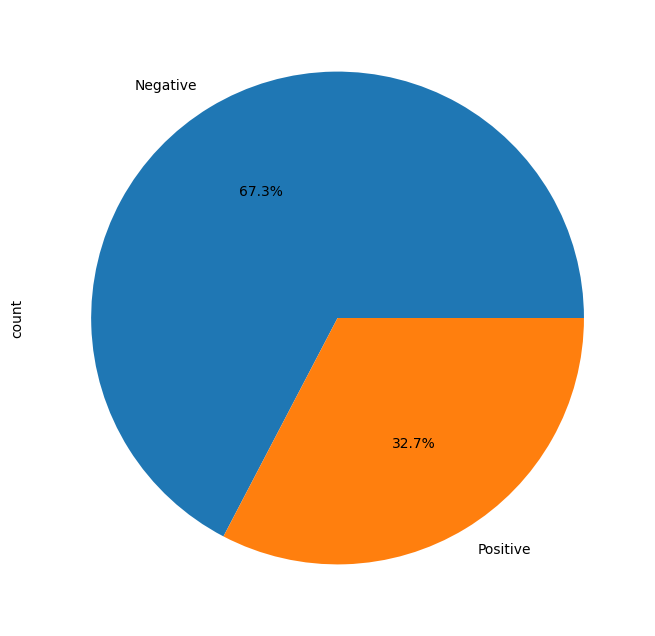

In [72]:
plt.figure(figsize = (8, 8))
data['Sentiment'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Clearly the data is skewwed towards negative. This shows that there is a class imbalance.

We need to keep in mind when we start building our models.

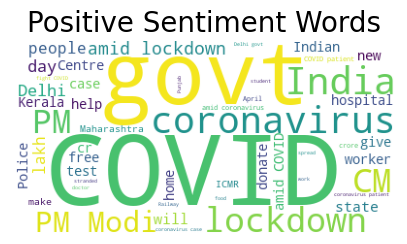

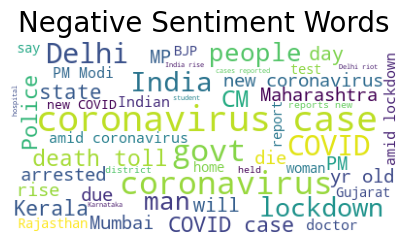

In [73]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - data: news dataset
       - category: Positive/Negative
    '''
    # Combine all tweets
    combined_tweets = ' '.join(df[df['Sentiment'] == category]['Headline'])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(5,5))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(data, 'Positive')
     
# Negative tweet words
wordcount_gen(data, 'Negative')

WordCloud is used to give a visual representation of text data where the size of each word indicates its frequency or importance within the dataset. 

# Data preprocessing

Data preprocessing involves transforming raw data, obtained after the data loading step, into a clean and structured format suitable for use in models. This step is crucial to ensure that the data is accurate, consistent, and ready for analysis.

In [74]:
import numpy as np
from copy import deepcopy
from nltk.corpus import stopwords
from textblob import Word
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split 

In [75]:
X = data.drop('Sentiment', axis = 1)
y = data['Sentiment'].map({'Negative':0, 'Positive':1})

Tranforming text in Headline column into a standardized format which is more suitable for our model.

Here is what each part does:
1. Deep Copy: Creates a deep copy of the input data to avoid modifying the original DataFrame.
2. Lowercasing: Converts all characters in the 'Headline' column to lowercase.
3. Replacing Digits/Numbers: Removes all digits/numbers from the text in the 'Headline' column.
4. Removing Special Characters: Removes special characters (non-alphanumeric characters) from the text in the 'Headline' column.
5. Removing Stop Words: Removes common stop words (e.g., "and", "the", "is") from the text in the 'Headline' column.
6. Lemmatization: Converts words in the 'Headline' column to their base or root form. Used to standardize words so that variations of the same word are treated as the same entity. e.g., "running" to "run".



In [76]:
def cleaning(data, stop_words):
    df = deepcopy(data)
    # Lower case
    df['Headline'] = df['Headline'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    # Replacing the digits/numbers
    df['Headline'] = df['Headline'].str.replace(r'\d+','', regex=True)
    # Removing special characters
    df['Headline'] = df['Headline'].str.replace(r'[^\w\s]','', regex=True)
    # Removing stop words
    df['Headline'] = df['Headline'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['Headline'] = df['Headline'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))
    return df
stop_words = stopwords.words('english')
corpus = cleaning(X, stop_words)
print(corpus.head())

                                                              Headline
0                     coronavirus case reach rajasthan patient recover
1                 coronavirus case delhi surge new case reported today
2  anguished ill always recall interaction pm modi rishi kapoors death
3        terrible week indian cinema rahul gandhi rishi kapoors demise
4             delhi police perform parikrama aiims thank medical staff


We furthur convert this data into it's one-hot representation.
Converting text data to one-hot representation is a crucial step in preparing text data for various NLP tasks, enabling the application of machine learning models to analyze and extract insights from textual information.

In [77]:
vocab_size = 5000

onehot_repr = [one_hot(words, vocab_size) for words in corpus['Headline']]
print(onehot_repr[:5])

[[3465, 1547, 670, 3488, 126, 776], [3465, 1547, 2733, 1020, 3861, 1547, 2817, 3282], [3392, 499, 4931, 2145, 3376, 2972, 2633, 3191, 1514, 1017], [1163, 200, 1298, 3119, 1276, 3053, 3191, 1514, 2803], [2733, 1532, 3819, 468, 1938, 170, 2196, 4330]]


Clearly the shape is not consistent, hence we need to apply padding to ensure the one-hot encoded words have the same length.
This is necessary for batch processing and efficient computation in neural network.

In [78]:
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = 20)
print(embedded_docs[:5])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  3465 1547  670 3488  126  776]
 [   0    0    0    0    0    0    0    0    0    0    0    0 3465 1547
  2733 1020 3861 1547 2817 3282]
 [   0    0    0    0    0    0    0    0    0    0 3392  499 4931 2145
  3376 2972 2633 3191 1514 1017]
 [   0    0    0    0    0    0    0    0    0    0    0 1163  200 1298
  3119 1276 3053 3191 1514 2803]
 [   0    0    0    0    0    0    0    0    0    0    0    0 2733 1532
  3819  468 1938  170 2196 4330]]


Finally we spit the data which we are going to use for train and test.

In [79]:
# Splitting the dataset

X = np.array(embedded_docs)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)

(3257, 20) (3257,)


# Model

Since the data suggests that we need a classification model(sentiment is either 0 or 1) we'll be first testing out a simple logistic regression. Then we'll try out a couple of RNN models(LSTM and Bidirectional LSTM).

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

## Logistic Regression

If you recall, the data we have is imbalanced, that is, skewwed towards negative.
This is have a very bad effect on the Logistic Regression model.
Therefore we need to make the data balanced using SMOTE(Synthetic Minority Over-sampling Technique).
It is a technique used in machine learning to address class imbalance in datasets, particularly in classification tasks.

In [81]:
# Check class distribution
print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts())

print("Class distribution in y_test:")
print(pd.Series(y_test).value_counts())

# Making the data balanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Class distribution in y_resampled:")
print(pd.Series(y_resampled).value_counts())

Class distribution in y_train:
0    2177
1    1080
Name: count, dtype: int64
Class distribution in y_test:
0    565
1    250
Name: count, dtype: int64
Class distribution in y_resampled:
0    2177
1    2177
Name: count, dtype: int64


In [82]:
# Fit the classifier
classifier = LogisticRegression()
classifier.fit(X_resampled, y_resampled)

# Predict
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.5177914110429448


c:\Users\Pranaav_Prasad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## LSTM

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture. LSTMs are powerful models commonly used for sequence prediction and sequence classification tasks in natural language processing (NLP), time series analysis, and other domains where sequential data is prevalent.

In [83]:
# LSTM Model

model_LSTM = Sequential()
model_LSTM.add(Embedding(vocab_size, 40, input_length = 20))
model_LSTM.add(SpatialDropout1D(0.4))
model_LSTM.add(LSTM(200, dropout = 0.2, recurrent_dropout = 0.2))
model_LSTM.add(Dense(100, activation = 'leaky_relu'))
model_LSTM.add(Dense(1, activation = 'sigmoid'))
model_LSTM.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

c:\Users\Pranaav_Prasad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
history_LSTM = model_LSTM.fit(X_train, y_train, validation_data =(X_test, y_test) , epochs = 10, batch_size = 64, verbose=1)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.6643 - loss: 0.6522 - val_accuracy: 0.6933 - val_loss: 0.5827
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7135 - loss: 0.5411 - val_accuracy: 0.7718 - val_loss: 0.4605
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8399 - loss: 0.3574 - val_accuracy: 0.7791 - val_loss: 0.4905
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8942 - loss: 0.2603 - val_accuracy: 0.7890 - val_loss: 0.5239
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9145 - loss: 0.2103 - val_accuracy: 0.7644 - val_loss: 0.5451
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9416 - loss: 0.1693 - val_accuracy: 0.7718 - val_loss: 0.6438
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9608 - loss: 0.1219 - val_accuracy: 0.7730 - val_loss: 0.6689
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9652 - loss: 0.1053 - val_accuracy: 0.7742 - v

## Bidirectional LSTM

A Bidirectional Long Short-Term Memory (BiLSTM) model is an extension of the traditional Long Short-Term Memory (LSTM) architecture. In a standard LSTM, information flows only from past to future, which means the model can only consider past context when making predictions. In contrast, a BiLSTM model processes input sequences in both forward and backward directions simultaneously, allowing it to capture information from both past and future contexts.

In [85]:
# Bidirectional LSTM Model

model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(vocab_size, 40, input_length = 20))
model_BiLSTM.add(SpatialDropout1D(0.4))
model_BiLSTM.add(Bidirectional(LSTM(200, dropout = 0.2, recurrent_dropout = 0.2)))
model_BiLSTM.add(Dense(100, activation = 'leaky_relu'))
model_BiLSTM.add(Dense(1, activation = 'sigmoid'))
model_BiLSTM.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [86]:
history_BiLSTM = model_BiLSTM.fit(X_train, y_train, validation_data =(X_test, y_test) , epochs = 10, batch_size = 64, verbose=1)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.6483 - loss: 0.6589 - val_accuracy: 0.6933 - val_loss: 0.5767
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7277 - loss: 0.5269 - val_accuracy: 0.7804 - val_loss: 0.4573
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8559 - loss: 0.3456 - val_accuracy: 0.7926 - val_loss: 0.4597
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8916 - loss: 0.2708 - val_accuracy: 0.7840 - val_loss: 0.5088
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9257 - loss: 0.1955 - val_accuracy: 0.7718 - val_loss: 0.5392
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9388 - loss: 0.1692 - val_accuracy: 0.7767 - val_loss: 0.6159
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9551 - loss: 0.1220 - val_accuracy: 0.7620 - val_loss: 0.6261
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9690 - loss: 0.0996 - val_accuracy: 0

# Performance metrics and Accuracy

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Let's compare the three models we trained.

In [88]:
y_pred_LR = classifier.predict(X_test)

confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)

print("Confusion Matrix: \n", confusion_matrix_LR)
print("Accuracy: ", accuracy_LR)
print("Precision: ", precision_LR)
print("Recall: ", recall_LR)
print("F1 Score: ", f1_LR)

Confusion Matrix: 
 [[301 264]
 [129 121]]
Accuracy:  0.5177914110429448
Precision:  0.3142857142857143
Recall:  0.484
F1 Score:  0.38110236220472443


In [89]:
y_pred_LSTM = model_LSTM.predict(X_test)

confusion_matrix_LSTM = confusion_matrix(y_test, y_pred_LSTM.round())
accuracy_LSTM = accuracy_score(y_test, y_pred_LSTM.round())
precision_LSTM = precision_score(y_test, y_pred_LSTM.round())
recall_LSTM = recall_score(y_test, y_pred_LSTM.round())
f1_LSTM = f1_score(y_test, y_pred_LSTM.round())

print("Confusion Matrix for LSTM: \n", confusion_matrix_LSTM)
print("Accuracy for LSTM: ", accuracy_LSTM)
print("Precision for LSTM: ", precision_LSTM)
print("Recall for LSTM: ", recall_LSTM)
print("F1 Score for LSTM: ", f1_LSTM)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Confusion Matrix for LSTM: 
 [[455 110]
 [ 84 166]]
Accuracy for LSTM:  0.7619631901840491
Precision for LSTM:  0.6014492753623188
Recall for LSTM:  0.664
F1 Score for LSTM:  0.6311787072243346


In [90]:
y_pred_BiLSTM = model_BiLSTM.predict(X_test)

confusion_matrix_BiLSTM = confusion_matrix(y_test, y_pred_BiLSTM.round())
accuracy_BiLSTM = accuracy_score(y_test, y_pred_BiLSTM.round())
precision_BiLSTM = precision_score(y_test, y_pred_BiLSTM.round())
recall_BiLSTM = recall_score(y_test, y_pred_BiLSTM.round())
f1_BiLSTM = f1_score(y_test, y_pred_BiLSTM.round())

print("Confusion Matrix for BiLSTM: \n", confusion_matrix_BiLSTM)
print("Accuracy for BiLSTM: ", accuracy_BiLSTM)
print("Precision for BiLSTM: ", precision_BiLSTM)
print("Recall for BiLSTM: ", recall_BiLSTM)
print("F1 Score for BiLSTM: ", f1_BiLSTM)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
Confusion Matrix for BiLSTM: 
 [[492  73]
 [120 130]]
Accuracy for BiLSTM:  0.7631901840490798
Precision for BiLSTM:  0.6403940886699507
Recall for BiLSTM:  0.52
F1 Score for BiLSTM:  0.5739514348785872


Clearly, our RNN models do better than the traditional Logistic Regression model.

To get a better idea how our two RNN compare with each other, let's visualize!

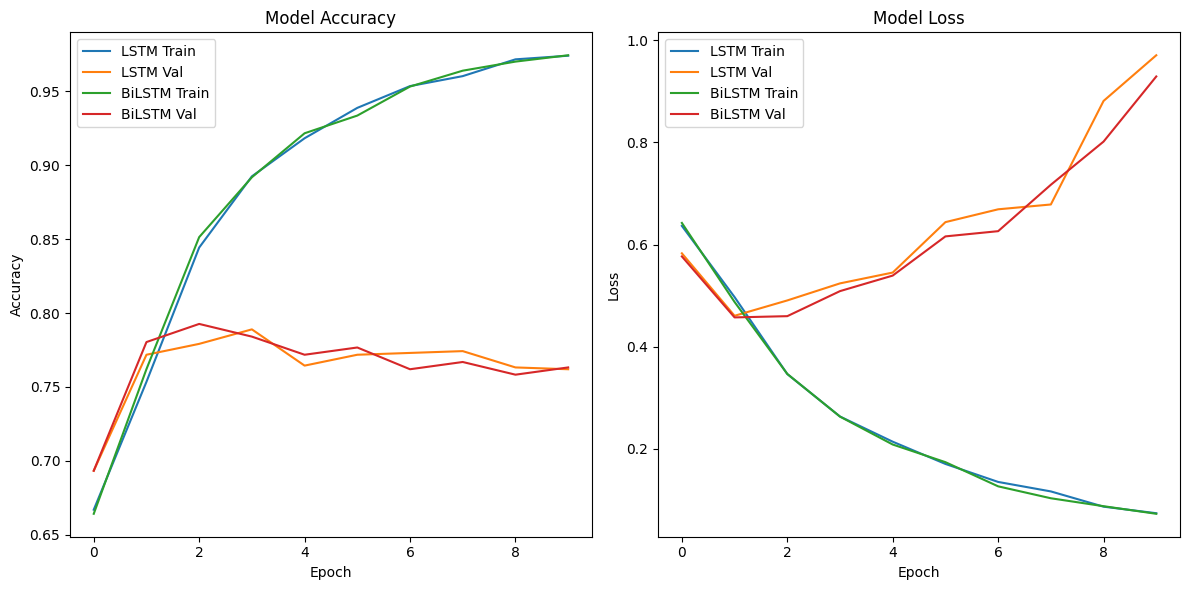

In [91]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history_BiLSTM.history['accuracy'])
plt.plot(history_BiLSTM.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val', 'BiLSTM Train', 'BiLSTM Val'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history_BiLSTM.history['loss'])
plt.plot(history_BiLSTM.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val', 'BiLSTM Train', 'BiLSTM Val'], loc='upper left')

plt.tight_layout()
plt.show()

# Recommender

Now coming to our actual Recommender System. We used the models we trained above to classify the latest news headlines as positive and negative.

In [92]:
import pandas as pd

In [93]:
news = pd.read_csv(r'india-news-headlines.csv')
news.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; says Vajpayee
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [94]:
news.rename(columns = {'headline_text':'Headline'}, inplace = True)
news.head()

,Headline
0,Status quo will not be disturbed at Ayodhya; says Vajpayee
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


Transforming headlines similar to data that the model was trained on to get valid results.

In [95]:
news_cleaned = cleaning(news, stop_words)
onehot_news_cleaned = [one_hot(words, vocab_size) for words in news_cleaned['Headline']]
embedded_news = pad_sequences(onehot_news_cleaned, padding = 'pre', maxlen = 20)

In [96]:
pred = model_LSTM.predict(embedded_news).round().astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [97]:
pd.set_option('display.max_colwidth', None)
positive_news = news.loc[pred == 1, 'Headline'].sample(10)
print("Positive News Headlines:\n", positive_news)

Positive News Headlines:
 72           Move to stop freedom fighters' pension flayed
295     Anti-immigration think-tank berates Clinton regime
824                                     Rice miller nabbed
629                      CET Cell returns Rs 13 cr to govt
740                Jharkhand govt to set up own power grid
371            Philippine soldiers arrest bombing suspects
712    Minister inquired about Hinduja passport; admits UK
600            Superstition; poverty increasing AIDS cases
617                    New molecule to fight malaria found
689                  Net familiarity will drive e-commerce
Name: Headline, dtype: object


Finally we get the positive news which we can be recommended to users.